# Odev 4

### Ödev4 Kod

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal


%matplotlib notebook

#Z_plane function from the below link
#https://www.dsprelated.com/showcode/244.php
def zplane(b,a):

    # Input: numerator and denominator coefficients:
    zeross,poless,k = signal.tf2zpk(b, a)
    if not zeross.size:
        zeross = np.zeros(len(poless))

    if not poless.size:
        poless = np.zeros(len(zeross))

    tol = 1e-4

    real_p = np.real(poless).copy()
    real_z = np.real(zeross).copy()
    imag_p = np.imag(poless).copy()
    imag_z = np.imag(zeross).copy()

    if not real_z.size:
        real_z[abs(real_z) < tol] = 0
    if not imag_z.size:
        imag_z[abs(imag_z) < tol] = 0
    if not real_p.size:
        real_p[abs(real_p) < tol] = 0
    if not imag_p.size:
        imag_p[abs(imag_p) < tol] = 0

    z = np.round(real_z,2) + 1j*np.round(imag_z,2)
    p = np.round(real_p,2) + 1j*np.round(imag_p,2)

    # plot the unit circle
    N = 128
    m = np.arange(0,N,1)
    unitCircle = np.exp(1j*m*2*np.pi/N)

    plt.figure()
    plt.plot(np.real(unitCircle), np.imag(unitCircle), 'b--', linewidth=0.3)
    plt.xlabel('Real Part'), plt.ylabel('Imaginary Part')

    # calculate the plot limits
    Cz, z_counts = np.unique(z, return_counts=True)
    Cp, p_counts = np.unique(p, return_counts=True)

    zz = [idx1 for idx1, valz in enumerate(z_counts) if valz > 1]
    pp = [idx2 for idx2, valp in enumerate(p_counts) if valp > 1]
    zval = z_counts[zz]
    pval = p_counts[pp]
    zs = Cz[zz]
    ps = Cp[pp]

    real_roots = np.concatenate((np.real(p),np.real(z)))
    imag_roots = np.concatenate((np.imag(p),np.imag(z)))

    # adjust plot limits
    xlower = min(-1, min(real_roots)) - 0.3
    xupper = max(1,  max(real_roots)) + 0.3
    ylower = min(-1, min(imag_roots)) - 0.3
    yupper = max(1,  max(imag_roots)) + 0.3
    plt.xlim(xlower, xupper), plt.ylim(ylower, yupper)

    # plot axes
    Xaxis = np.arange(xlower, xupper, 0.1)
    Yaxis = np.arange(ylower, yupper, 0.1)
    plt.plot(np.real(Xaxis), np.imag(Xaxis), 'b--', linewidth=0.3)
    plt.plot(np.imag(Yaxis), np.real(Yaxis), 'b--', linewidth=0.3)

    # plot poles and zeros
    plt.plot(np.real(z), np.imag(z), 'ro',  markerfacecolor = 'none')
    plt.plot(np.real(p), np.imag(p), 'rx')

    if zz:
        txtz = str(zval)[1:-1]
    plt.annotate(txtz, xy=(np.real(zs)+0.1,np.imag(zs)+0.1))
        
    if pp:
        txtp = str(pval)[1:-1]
        plt.annotate(txtp, xy=(np.real(ps)+0.1,np.imag(ps)+0.1))

    plt.grid()
    plt.show()
    

    return z, p, k

##### 1-)
y[n]-1/2y[n-1] + 4y[n-2] - 2y[n-3] = x[n] + 2/3x[n-1] + 1/9x[n-2]

h[n] = y[n]/x[n]

h(z) = (1 + 2/3*z^-1 + 1/9z^-2)/(1 - 1/2z^-1 + 4z^-2 - 2z^-3)

<IPython.core.display.Javascript object>


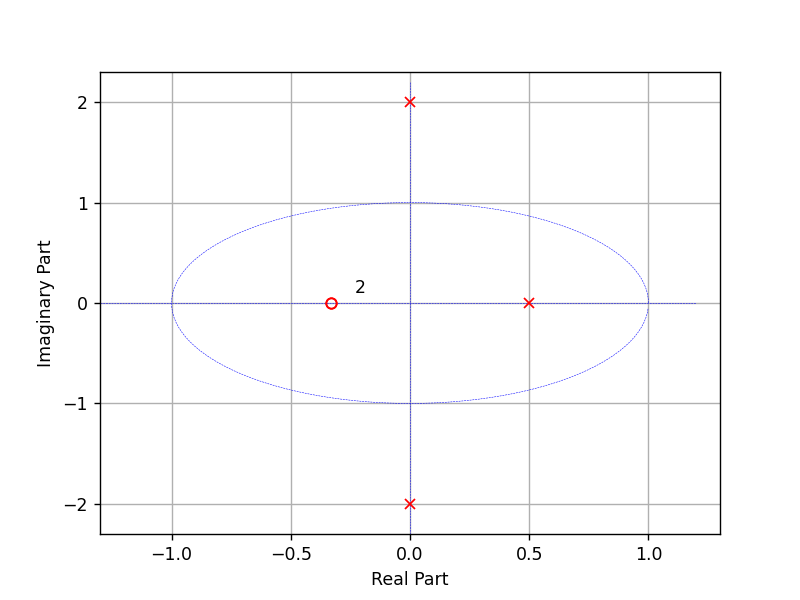

(array([-0.33+0.j, -0.33+0.j]), array([0. +2.j, 0. -2.j, 0.5+0.j]), 1.0)

In [11]:
#Pay ve payda katsayılarının tanımlanması
num = np.array([1, 2/3, 1/9])
denum = np.array([1, -1/2, 4, -2])

zplane(num, denum)

#### c)

##### c.1. h[n], n < 0 için --------------> ROC bilinemez

##### c.2. eğer Fourier dönüşümü varsa -------> ROC birim çemberi kapsamaktadır.

<IPython.core.display.Javascript object>


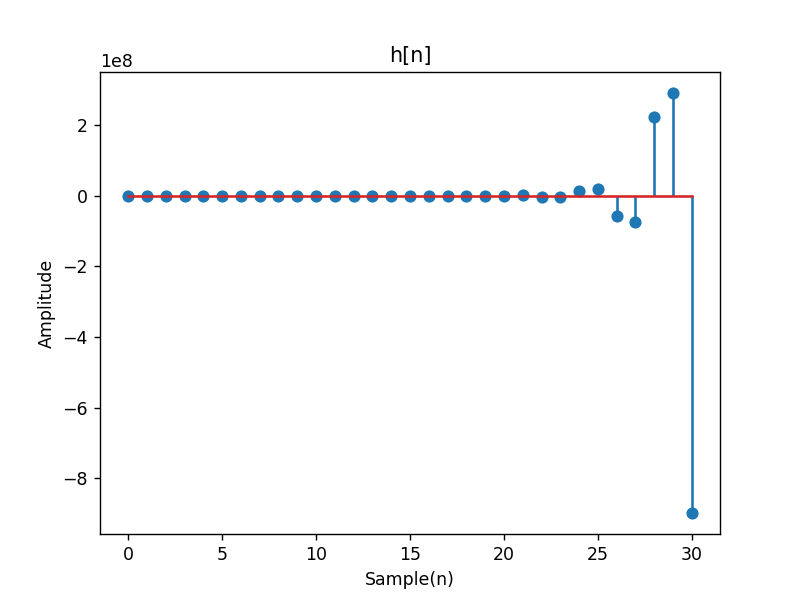

<IPython.core.display.Javascript object>


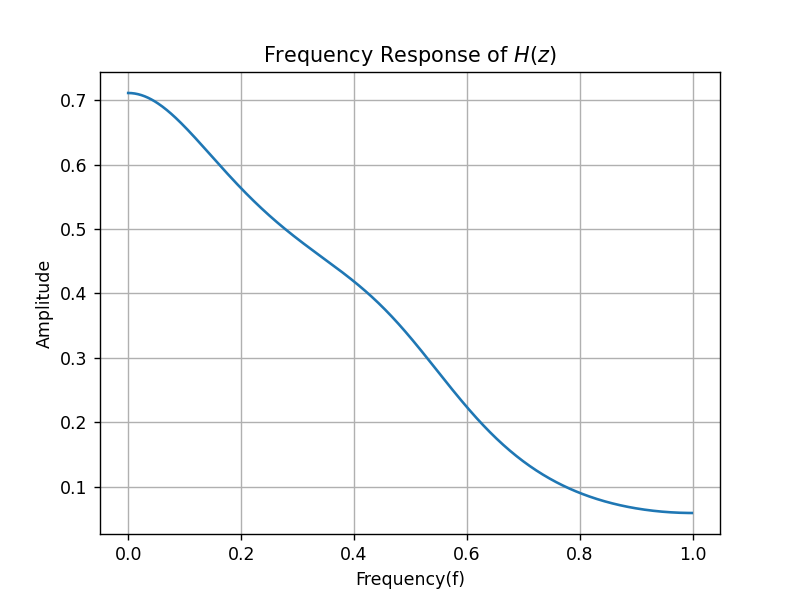

In [19]:
#Kuvvet Serisine açma
num = np.array([1, 2/3, 1/9, 0])
denum = np.array([1, -1/2, 4, -2])

n, h = signal.dimpulse((num, denum, 1), x0 = 0, n = 31)

plt.figure()
plt.stem(n, np.squeeze(h))
plt.xlabel("Sample(n)")
plt.ylabel("Amplitude")
plt.title("h[n]")

#Sistem kararlı değildir. sonsuze gidiyor.


w, H_tf = signal.freqz(num, denum)

plt.figure()
plt.plot(w/np.pi, abs(H_tf))
plt.xlabel("Frequency(f)")
plt.ylabel("Amplitude")
plt.title('Frequency Response of $H(z)$')
plt.grid()



#### e)

###### bu sistemi hem kararlı hem nedensel yapabilmek için hn ifadesi sonlu bir ifade olmalıdır. h[n] sağ yanlı olduğu için zaten nedenseldir.